# Comparison of prototype latencies

## Imports

In [1]:
import numpy as np
import h5py
from matplotlib import pyplot as plt

## Load signal and filter output from file

In [2]:
PYTHON_ECHO_FPATH = '../data/results/python_echo.h5'
with h5py.File(PYTHON_ECHO_FPATH, 'r') as f:
    fp_python_echo = f['filter_preds'][:]
    rt_python_echo = f['rt_times_us'][:]
    
PYTHON_LMS_FPATH = '../data/results/python_lms.h5'
with h5py.File(PYTHON_LMS_FPATH, 'r') as f:
    fp_python_lms = f['filter_preds'][:]
    rt_python_lms = f['rt_times_us'][:]

JULIA_ECHO_FPATH = '../data/results/julia_echo.h5'
with h5py.File(JULIA_ECHO_FPATH, 'r') as f:
    fp_julia_echo = f['filter_preds'][:]
    rt_julia_echo = f['rt_times_us'][:]
    
RUST_ECHO_FPATH = '../data/results/rust_echo.h5'
with h5py.File(RUST_ECHO_FPATH, 'r') as f:
    fp_rust_echo = f['filter_preds'][:]
    rt_rust_echo = f['rt_times_us'][:]
    
RUST_LMS_FPATH = '../data/results/rust_lms.h5'
with h5py.File(RUST_LMS_FPATH, 'r') as f:
    fp_rust_lms = f['filter_preds'][:]
    rt_rust_lms = f['rt_times_us'][:]
    
C_ECHO_FPATH = '../data/results/c_echo.h5'
with h5py.File(C_ECHO_FPATH, 'r') as f:
    fp_c_echo = f['filter_preds'][:].T
    rt_c_echo = f['rt_times_us'][:].T
    
C_LMS_FPATH = '../data/results/c_lms.h5'
with h5py.File(C_LMS_FPATH, 'r') as f:
    fp_c_lms = f['filter_preds'][:].T
    rt_c_lms = f['rt_times_us'][:].T

## Latency distribution (Echo)

In [3]:
print(f'Median (Python echo): {np.median(rt_python_echo):.2f} us')
print(f'Median (Julia echo): {np.median(rt_julia_echo):.2f} us')
print(f'Median (Rust echo): {np.median(rt_rust_echo):.2f} us')
print(f'Median (C echo): {np.median(rt_c_echo):.2f} us')

Median (Python echo): 45.00 us
Median (Julia echo): 109.75 us
Median (Rust echo): 37.01 us
Median (C echo): 29.00 us


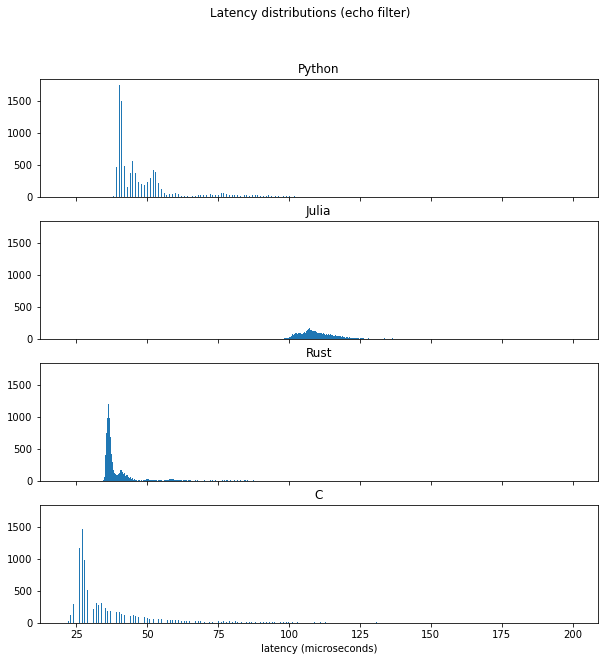

In [4]:
ECHO_PLT_MAX = 200

fig, ax = plt.subplots(4, 1, figsize=(10, 10), sharex=True, sharey=True)

ax[0].set_title('Python');
ax[0].hist(rt_python_echo[rt_python_echo < ECHO_PLT_MAX], bins=500)

ax[1].set_title('Julia');
ax[1].hist(rt_julia_echo[rt_julia_echo < ECHO_PLT_MAX], bins=500)

ax[2].set_title('Rust');
ax[2].hist(rt_rust_echo[rt_rust_echo < ECHO_PLT_MAX], bins=500);

ax[3].set_title('C');
ax[3].set(xlabel='latency (microseconds)')
ax[3].hist(rt_c_echo[rt_c_echo < ECHO_PLT_MAX], bins=500);


fig.suptitle('Latency distributions (echo filter)')

plt.savefig('img/echo_latencies.png')

The latency distribution plots show that the echo filter latencies for the Python and Rust prototypes are very simliar, while Julia is slightly slower, and C is slightly faster. The more discretized Python and C data is due to the fact that Python and C compute time in microseconds, while Rust and Julia compute it at the nanosecond level.

## Latency distribution (LMS)

In [5]:
print(f'Median (Python LMS): {np.median(rt_python_lms):.2f} us')
print(f'Median (Rust LMS): {np.median(rt_rust_lms):.2f} us')
print(f'Median (C LMS): {np.median(rt_c_lms):.2f} us')

Median (Python LMS): 5579.00 us
Median (Rust LMS): 11173.65 us
Median (C LMS): 1531.00 us


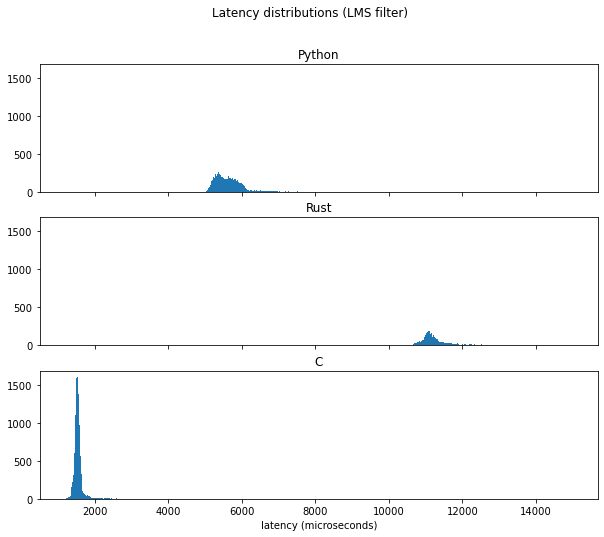

In [6]:
LMS_PLT_MAX = 15000

fig, ax = plt.subplots(3, 1, figsize=(10, 8), sharex=True, sharey=True)

ax[0].set_title('Python');
ax[0].hist(rt_python_lms[rt_python_lms < LMS_PLT_MAX], bins=500)

ax[1].set_title('Rust');
ax[1].hist(rt_rust_lms[rt_rust_lms < LMS_PLT_MAX], bins=500);

ax[2].set_title('C');
ax[2].set(xlabel='latency (microseconds)')
ax[2].hist(rt_c_lms[rt_c_lms < LMS_PLT_MAX], bins=500);

fig.suptitle('Latency distributions (LMS filter)')

plt.savefig('img/lms_latencies.png')